In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Hasil pengamatan:
- Data memiliki 466285 baris dan 75 kolom
- Terdapat fitur atau kolom yang memiliki null values (kolom yang null values > 50% akan di drop)
- Fitur atau kolom yang kebanyakan unique values akan dihapus / drop
- Belum ada kolom target

#### Check Duplicated Data

In [129]:
df.duplicated().any()

False

In [4]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericals_df = df.select_dtypes(include = num_dtypes)

categoricals_df = df.select_dtypes(include = 'object')

nums = numericals_df.columns
cats = categoricals_df.columns

print('ini fitur type numerical:', nums)
print('')
print('ini fitur type numerical:', cats)

ini fitur type numerical: Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
     

In [11]:
df.sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
187290,187290,1681855,1964487,16000,16000,15750.00000,60 months,12.12,356.89,B,...,NaN,NaN,NaN,NaN,NaN,NaN,22800.0,NaN,NaN,NaN
150212,150212,4166907,5309241,35000,35000,35000.00000,60 months,23.63,999.38,F,...,NaN,NaN,NaN,NaN,NaN,NaN,17700.0,NaN,NaN,NaN
334966,334966,21199998,23502897,35000,35000,35000.00000,60 months,18.24,893.35,D,...,NaN,NaN,NaN,NaN,NaN,NaN,87600.0,NaN,NaN,NaN
436541,436541,11635603,13607756,8000,8000,8000.00000,36 months,18.92,292.93,D,...,NaN,NaN,NaN,NaN,NaN,NaN,14300.0,NaN,NaN,NaN
34833,34833,446787,546711,4000,4000,4000.00000,36 months,11.83,132.54,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264409,264409,32008239,34621406,9700,9700,9700.00000,36 months,16.29,342.42,D,...,NaN,NaN,NaN,NaN,NaN,NaN,5600.0,NaN,NaN,NaN
22386,22386,630680,796600,15000,15000,14441.79456,36 months,6.17,457.49,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305393,305393,26980091,29473137,14750,14750,14750.00000,36 months,14.99,511.25,C,...,NaN,NaN,NaN,NaN,NaN,NaN,8100.0,NaN,NaN,NaN
58695,58695,8961817,10753209,15000,15000,15000.00000,36 months,8.90,476.30,A,...,NaN,NaN,NaN,NaN,NaN,NaN,38000.0,NaN,NaN,NaN
253643,253643,34753140,37446433,5000,5000,5000.00000,36 months,8.67,158.24,B,...,NaN,NaN,NaN,NaN,NaN,NaN,16800.0,NaN,NaN,NaN


In [9]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


Hasil pengamatan:
- Fitur / kolom `Unnamed: 0`, `id`, `member_id` mempresentasikan unique values

In [7]:
df[cats].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [8]:
for col in cats:
    print(df[col].value_counts())
    print('')

 36 months    337953
 60 months    128332
Name: term, dtype: int64

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing 

In [13]:
df['policy_code'].value_counts()

1    466285
Name: policy_code, dtype: int64

Fitur `policy code` akan di drop nantinya karena memiliki satu value

In [14]:
df['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

Fitur  `application_type` akan di drop nantinya karena memiliki satu value

### Create a target of the loan_status feature

In [12]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### Create the Target

In [19]:
Status = []
for index, kolom in df.iterrows():
    if 'Current' in kolom['loan_status']:
        Status.append(1)
    elif 'Fully Paid' in kolom['loan_status']:
        Status.append(1)
    elif 'In Grace Period' in kolom['loan_status']:
        Status.append(1)
    else:
        Status.append(0)

df['Status_Borrower'] = Status

Melabelkan jika loan status `Current`, `Fully Paid`, dan `In Grace Period` mempresentasikan 1 (Good Borrower).<br>
Selain itu mempresentasikan 0 (Bad Borrower)

In [20]:
df['Status_Borrower'].value_counts()

1    414099
0     52186
Name: Status_Borrower, dtype: int64

Terdapat 414099 `Good Borrower` dan 52186 `Bad Borrower`

### Data Pre-Processing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Feature Selection

#### Ambil kolom yang diperlukan dan Drop kolom yang tidak diperlukan

In [22]:
df_xixi = df[['loan_amnt', 'int_rate', 'installment', 'grade', 'annual_inc', 'issue_d', 'pymnt_plan', 'delinq_2yrs', 'mths_since_last_delinq',
              'open_acc', 'revol_bal', 'revol_util', 'total_pymnt', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
              'acc_now_delinq', 'tot_cur_bal', 'total_rev_hi_lim', 'Status_Borrower']]
df_xixi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   installment                 466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   annual_inc                  466281 non-null  float64
 5   issue_d                     466285 non-null  object 
 6   pymnt_plan                  466285 non-null  object 
 7   delinq_2yrs                 466256 non-null  float64
 8   mths_since_last_delinq      215934 non-null  float64
 9   open_acc                    466256 non-null  float64
 10  revol_bal                   466285 non-null  int64  
 11  revol_util                  465945 non-null  float64
 12  total_pymnt                 466285 non-null  float64
 13  recoveries    

### Menampilkan null values

In [23]:
df_xixi.isna().sum()

loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
annual_inc                         4
issue_d                            0
pymnt_plan                         0
delinq_2yrs                       29
mths_since_last_delinq        250351
open_acc                          29
revol_bal                          0
revol_util                       340
total_pymnt                        0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med       145
acc_now_delinq                    29
tot_cur_bal                    70276
total_rev_hi_lim               70276
Status_Borrower                    0
dtype: int64

### Imputasi Numerikal

In [24]:
df_xixi['mths_since_last_delinq'].fillna(df_xixi['mths_since_last_delinq'].median(), inplace = True)
df_xixi['open_acc'].fillna(df_xixi['open_acc'].median(), inplace = True)
df_xixi['revol_util'].fillna(df_xixi['revol_util'].median(), inplace = True)
df_xixi['collections_12_mths_ex_med'].fillna(df_xixi['collections_12_mths_ex_med'].median(), inplace = True)
df_xixi['acc_now_delinq'].fillna(df_xixi['acc_now_delinq'].median(), inplace = True)
df_xixi['annual_inc'].fillna(df_xixi['annual_inc'].median(), inplace = True)
df_xixi['tot_cur_bal'].fillna(df_xixi['tot_cur_bal'].median(), inplace = True)
df_xixi['total_rev_hi_lim'].fillna(df_xixi['total_rev_hi_lim'].median(), inplace = True)
df_xixi['delinq_2yrs'].fillna(df_xixi['delinq_2yrs'].median(), inplace = True)

In [25]:
df_xixi.isna().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
annual_inc                    0
issue_d                       0
pymnt_plan                    0
delinq_2yrs                   0
mths_since_last_delinq        0
open_acc                      0
revol_bal                     0
revol_util                    0
total_pymnt                   0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_cur_bal                   0
total_rev_hi_lim              0
Status_Borrower               0
dtype: int64

#### Heatmap Corr

<AxesSubplot:>

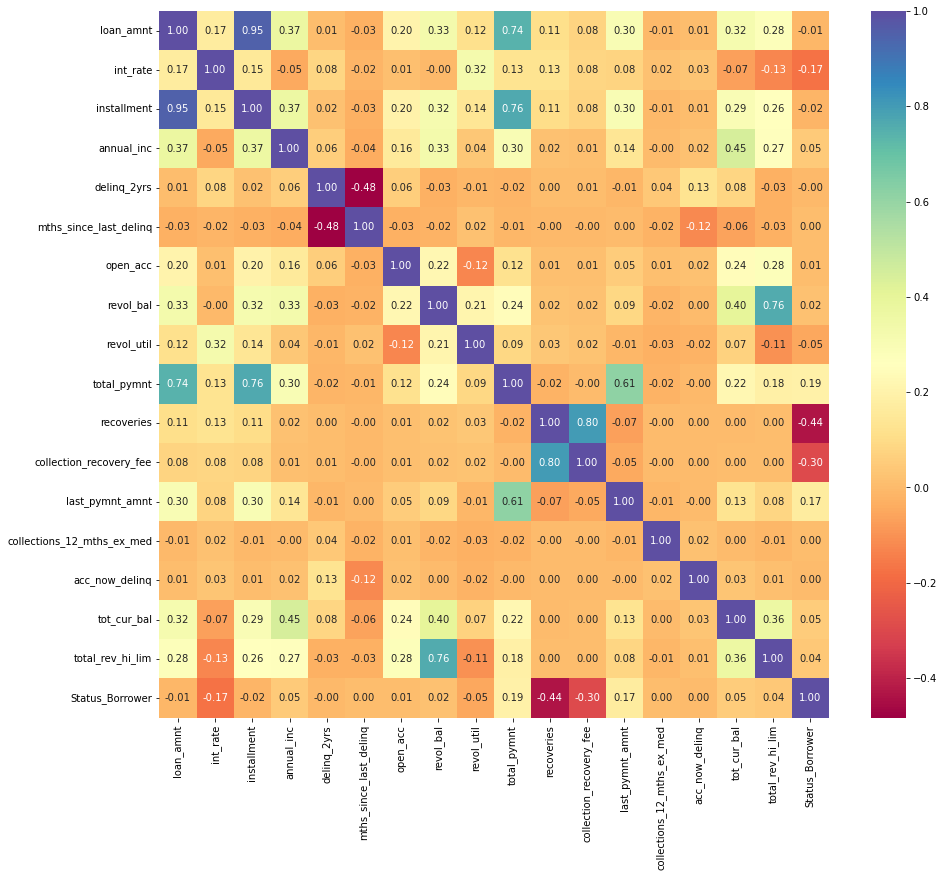

In [26]:
plt.figure(figsize = (15,13))
sns.heatmap(df_xixi.corr(), annot = True, fmt = '.2f', cmap = 'Spectral')

### Feature Selection Part 2

<AxesSubplot:>

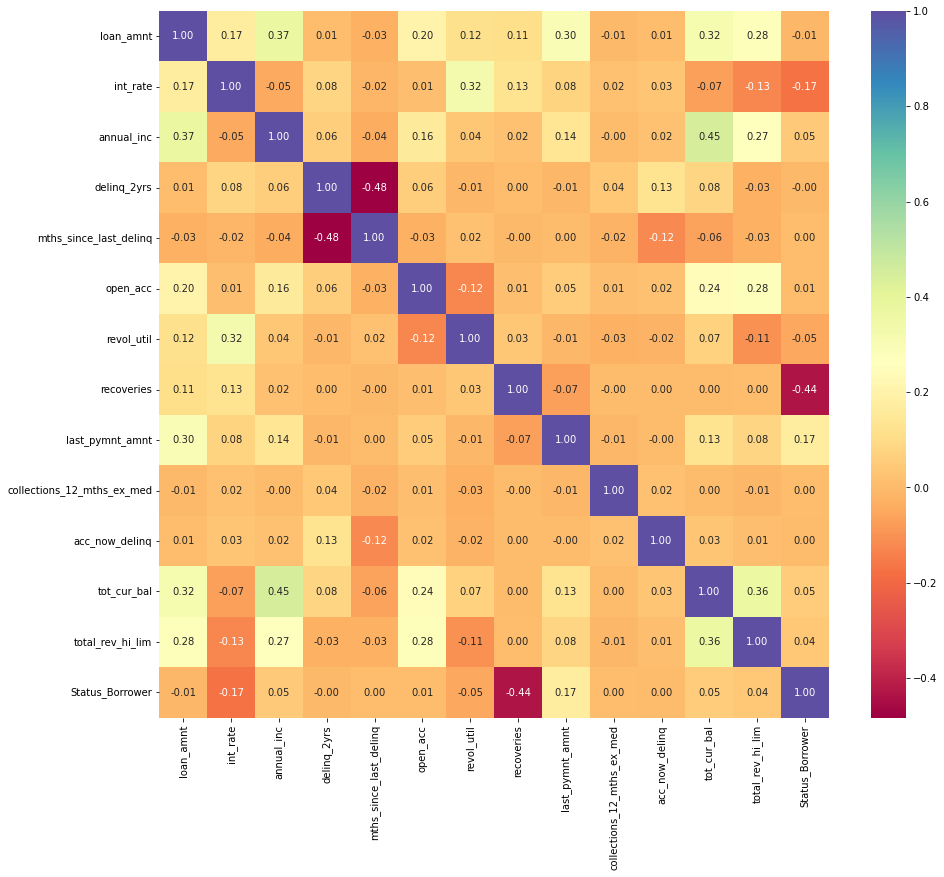

In [27]:
df_dropped = df_xixi.drop(columns = ['installment', 'total_pymnt', 'revol_bal', 'collection_recovery_fee', 'issue_d'])
plt.figure(figsize = (15,13))
sns.heatmap(df_dropped.corr(), annot = True, fmt = '.2f', cmap = 'Spectral')

Drop fitur yang dianggap redundan, seperti `installment`, `total_pymnt`, `revol_bal`, `collection_recovery_fee`, `issue_d`

In [28]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   grade                       466285 non-null  object 
 3   annual_inc                  466285 non-null  float64
 4   pymnt_plan                  466285 non-null  object 
 5   delinq_2yrs                 466285 non-null  float64
 6   mths_since_last_delinq      466285 non-null  float64
 7   open_acc                    466285 non-null  float64
 8   revol_util                  466285 non-null  float64
 9   recoveries                  466285 non-null  float64
 10  last_pymnt_amnt             466285 non-null  float64
 11  collections_12_mths_ex_med  466285 non-null  float64
 12  acc_now_delinq              466285 non-null  float64
 13  tot_cur_bal   

In [29]:
df_dropped.describe()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,revol_util,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,Status_Borrower
count,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,4.662850e+05,466285.000000
mean,14317.277577,13.829236,7.327729e+04,0.284661,32.437644,11.186995,56.177985,85.344211,3123.913796,0.009082,0.004002,1.301714e+05,2.923681e+04,0.888081
std,8286.509164,4.357587,5.496334e+04,0.797343,14.901093,4.987380,23.724005,552.216084,5554.737393,0.108632,0.068635,1.416729e+05,3.443264e+04,0.315267
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,10.990000,4.500000e+04,0.000000,31.000000,8.000000,39.200000,0.000000,312.620000,0.000000,0.000000,3.361100e+04,1.500000e+04,1.000000
50%,12000.000000,13.660000,6.300000e+04,0.000000,31.000000,10.000000,57.600000,0.000000,545.960000,0.000000,0.000000,8.153900e+04,2.280000e+04,1.000000
75%,20000.000000,16.490000,8.895300e+04,0.000000,31.000000,14.000000,74.700000,0.000000,3187.510000,0.000000,0.000000,1.849300e+05,3.430000e+04,1.000000
max,35000.000000,26.060000,7.500000e+06,29.000000,188.000000,84.000000,892.300000,33520.270000,36234.440000,20.000000,5.000000,8.000078e+06,9.999999e+06,1.000000


In [30]:
#inisiasi untuk handling outliers
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericals_df = df_dropped.select_dtypes(include = num_dtypes)

categoricals_df = df_dropped.select_dtypes(include = 'object')

nums = numericals_df.columns
cats = categoricals_df.columns

print(nums)
print(cats)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'revol_util', 'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_cur_bal', 'total_rev_hi_lim', 'Status_Borrower'],
      dtype='object')
Index(['grade', 'pymnt_plan'], dtype='object')


#### Handling Outliers

In [31]:
from scipy import stats
#Using Z-Score
print('Jumlah baris sebelum memfilter outlier:', len(df_dropped))

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df_dropped[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_dropped = df_dropped[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print('Jumlah baris setelah memfilter outlier:', len(df_dropped))

#Using Z-score

Jumlah baris sebelum memfilter outlier: 466285
Jumlah baris setelah memfilter outlier: 409433


#### Scalling

In [32]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   409433 non-null  int64  
 1   int_rate                    409433 non-null  float64
 2   grade                       409433 non-null  object 
 3   annual_inc                  409433 non-null  float64
 4   pymnt_plan                  409433 non-null  object 
 5   delinq_2yrs                 409433 non-null  float64
 6   mths_since_last_delinq      409433 non-null  float64
 7   open_acc                    409433 non-null  float64
 8   revol_util                  409433 non-null  float64
 9   recoveries                  409433 non-null  float64
 10  last_pymnt_amnt             409433 non-null  float64
 11  collections_12_mths_ex_med  409433 non-null  float64
 12  acc_now_delinq              409433 non-null  float64
 13  tot_cur_bal   

<AxesSubplot:>

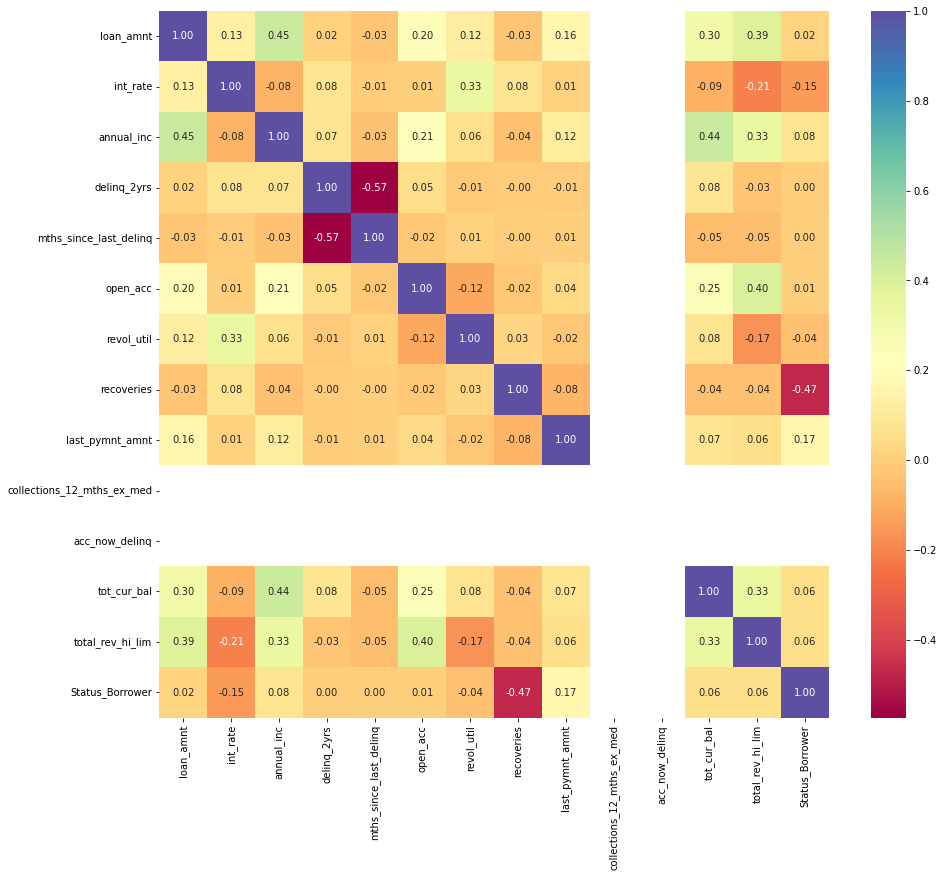

In [33]:
plt.figure(figsize = (15,13))
sns.heatmap(df_dropped.corr(), annot = True, fmt = '.2f', cmap = 'Spectral')

Hasil Pengamatan:
Setelah outliers dibuang, fitur `collections_12_mths_ex_med` dan `acc_now_delinq ` harus dihapus karena tidak ada korelasi

<AxesSubplot:>

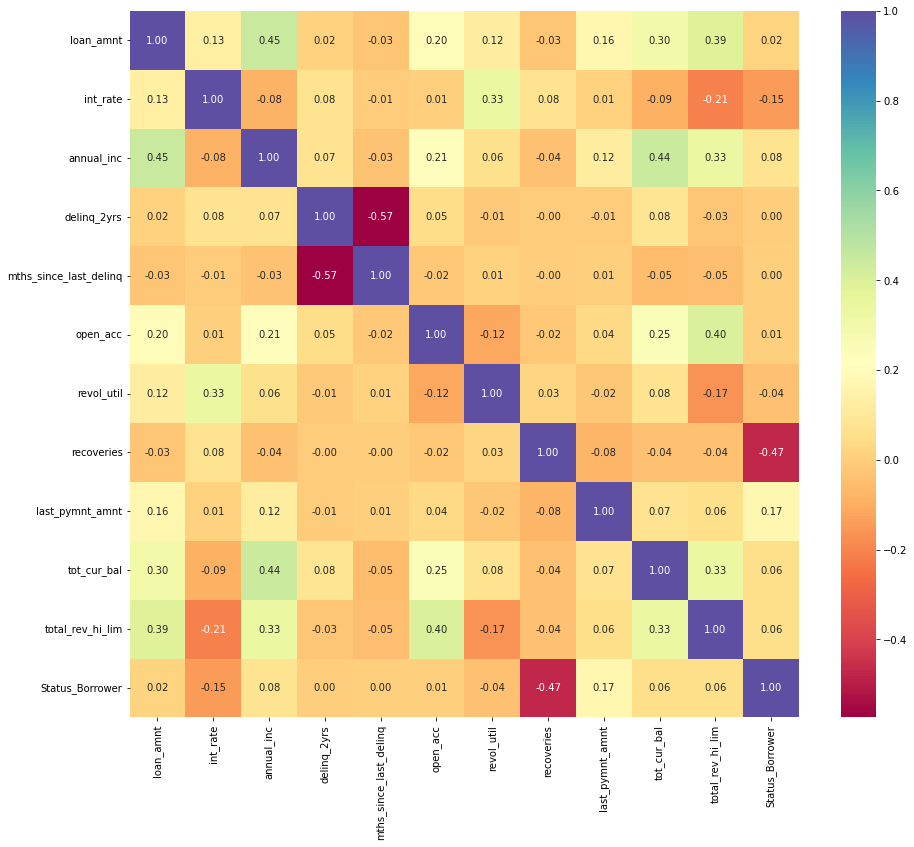

In [34]:
df_clean = df_dropped.drop(columns = ['collections_12_mths_ex_med', 'acc_now_delinq'])
plt.figure(figsize = (15,13))
sns.heatmap(df_clean.corr(), annot = True, fmt = '.2f', cmap = 'Spectral')

In [35]:
df_clean.describe()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,revol_util,recoveries,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,Status_Borrower
count,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000,409433.000000
mean,13517.322920,13.652855,67602.932265,0.189489,32.503257,10.830216,56.208492,25.374358,2551.349879,114883.851922,26697.243402,0.900443
std,7753.005323,4.274248,33660.868212,0.471433,13.518218,4.528988,23.621365,161.017504,4200.759213,110227.163465,18654.239895,0.299409
min,500.000000,5.420000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7800.000000,10.650000,44000.000000,0.000000,31.000000,8.000000,39.400000,0.000000,303.210000,31520.000000,14700.000000,1.000000
50%,12000.000000,13.480000,60000.000000,0.000000,31.000000,10.000000,57.600000,0.000000,517.510000,81539.000000,22800.000000,1.000000
75%,18000.000000,16.290000,84000.000000,0.000000,31.000000,13.000000,74.600000,0.000000,2657.440000,168193.000000,32300.000000,1.000000
max,35000.000000,26.060000,238000.000000,2.000000,77.000000,26.000000,125.800000,1741.730000,19787.920000,555184.000000,132530.000000,1.000000


In [36]:
#Scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_clean['loan_amnt_norm'] = MinMaxScaler().fit_transform(df_clean['loan_amnt'].values.reshape(len(df_clean), 1))
df_clean['int_rate_norm'] = MinMaxScaler().fit_transform(df_clean['int_rate'].values.reshape(len(df_clean), 1))
df_clean['annual_inc_std'] = StandardScaler().fit_transform(df_clean['annual_inc'].values.reshape(len(df_clean), 1))
df_clean['delinq_2yrs_norm'] = MinMaxScaler().fit_transform(df_clean['delinq_2yrs'].values.reshape(len(df_clean), 1))
df_clean['mths_since_last_delinq_norm'] = MinMaxScaler().fit_transform(df_clean['mths_since_last_delinq'].values.reshape(len(df_clean), 1))
df_clean['open_acc_norm'] = MinMaxScaler().fit_transform(df_clean['open_acc'].values.reshape(len(df_clean), 1))
df_clean['revol_util_norm'] = MinMaxScaler().fit_transform(df_clean['revol_util'].values.reshape(len(df_clean), 1))
df_clean['recoveries_std'] = StandardScaler().fit_transform(df_clean['recoveries'].values.reshape(len(df_clean), 1))
df_clean['last_pymnt_amnt_std'] = StandardScaler().fit_transform(df_clean['last_pymnt_amnt'].values.reshape(len(df_clean), 1))
df_clean['tot_cur_bal_std'] = StandardScaler().fit_transform(df_clean['tot_cur_bal'].values.reshape(len(df_clean), 1))
df_clean['total_rev_hi_lim_std'] = StandardScaler().fit_transform(df_clean['total_rev_hi_lim'].values.reshape(len(df_clean), 1))

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    409433 non-null  int64  
 1   int_rate                     409433 non-null  float64
 2   grade                        409433 non-null  object 
 3   annual_inc                   409433 non-null  float64
 4   pymnt_plan                   409433 non-null  object 
 5   delinq_2yrs                  409433 non-null  float64
 6   mths_since_last_delinq       409433 non-null  float64
 7   open_acc                     409433 non-null  float64
 8   revol_util                   409433 non-null  float64
 9   recoveries                   409433 non-null  float64
 10  last_pymnt_amnt              409433 non-null  float64
 11  tot_cur_bal                  409433 non-null  float64
 12  total_rev_hi_lim             409433 non-null  float64
 13 

In [38]:
#drop the original column that has not been scaling
df_cleaning = df_clean.drop(columns = ['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc',
                                       'revol_util', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim'])
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   grade                        409433 non-null  object 
 1   pymnt_plan                   409433 non-null  object 
 2   Status_Borrower              409433 non-null  int64  
 3   loan_amnt_norm               409433 non-null  float64
 4   int_rate_norm                409433 non-null  float64
 5   annual_inc_std               409433 non-null  float64
 6   delinq_2yrs_norm             409433 non-null  float64
 7   mths_since_last_delinq_norm  409433 non-null  float64
 8   open_acc_norm                409433 non-null  float64
 9   revol_util_norm              409433 non-null  float64
 10  recoveries_std               409433 non-null  float64
 11  last_pymnt_amnt_std          409433 non-null  float64
 12  tot_cur_bal_std              409433 non-null  float64
 13 

<AxesSubplot:>

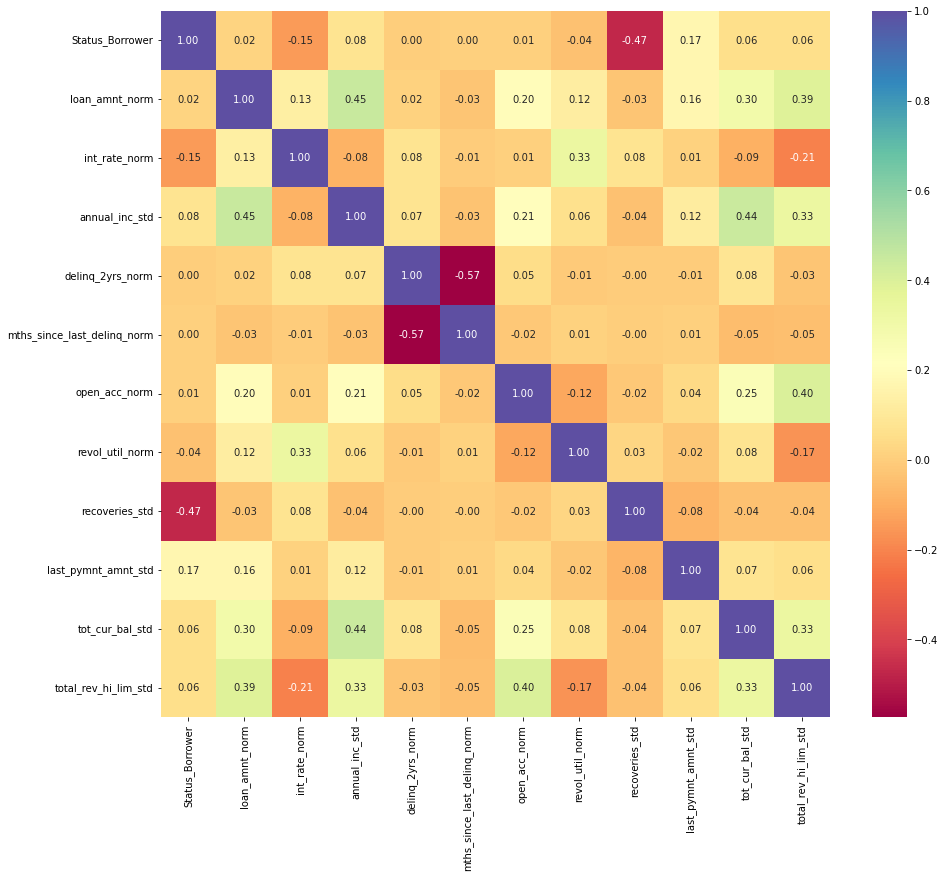

In [39]:
plt.figure(figsize = (15,13))
sns.heatmap(df_cleaning.corr(), annot = True, fmt = '.2f', cmap = 'Spectral')

#### Feature Encoding

In [40]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   grade                        409433 non-null  object 
 1   pymnt_plan                   409433 non-null  object 
 2   Status_Borrower              409433 non-null  int64  
 3   loan_amnt_norm               409433 non-null  float64
 4   int_rate_norm                409433 non-null  float64
 5   annual_inc_std               409433 non-null  float64
 6   delinq_2yrs_norm             409433 non-null  float64
 7   mths_since_last_delinq_norm  409433 non-null  float64
 8   open_acc_norm                409433 non-null  float64
 9   revol_util_norm              409433 non-null  float64
 10  recoveries_std               409433 non-null  float64
 11  last_pymnt_amnt_std          409433 non-null  float64
 12  tot_cur_bal_std              409433 non-null  float64
 13 

In [41]:
#one hot encoding
for cat in ['grade', 'pymnt_plan']:
    onehots = pd.get_dummies(df_cleaning[cat], prefix=cat)
    df_cleaning = df_cleaning.join(onehots)

In [42]:
#drop pymnt_plan, grade
df_cleaning = df_cleaning.drop(columns = ['pymnt_plan', 'grade'])
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Status_Borrower              409433 non-null  int64  
 1   loan_amnt_norm               409433 non-null  float64
 2   int_rate_norm                409433 non-null  float64
 3   annual_inc_std               409433 non-null  float64
 4   delinq_2yrs_norm             409433 non-null  float64
 5   mths_since_last_delinq_norm  409433 non-null  float64
 6   open_acc_norm                409433 non-null  float64
 7   revol_util_norm              409433 non-null  float64
 8   recoveries_std               409433 non-null  float64
 9   last_pymnt_amnt_std          409433 non-null  float64
 10  tot_cur_bal_std              409433 non-null  float64
 11  total_rev_hi_lim_std         409433 non-null  float64
 12  grade_A                      409433 non-null  uint8  
 13 

<AxesSubplot:>

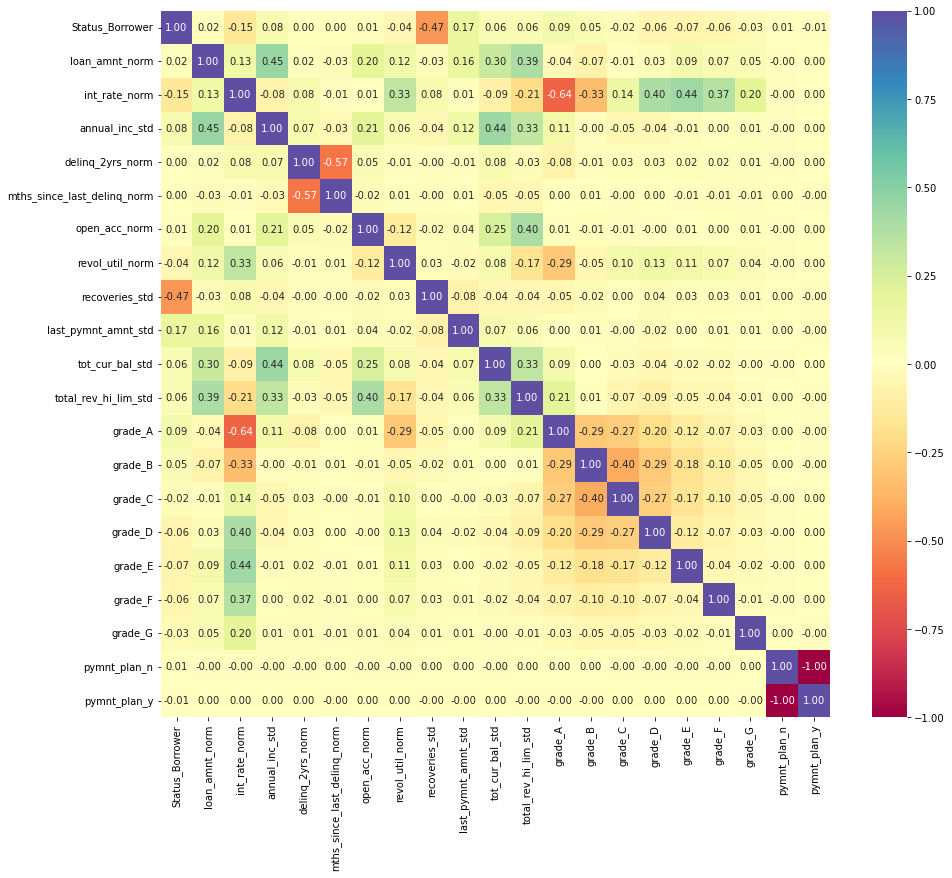

In [43]:
plt.figure(figsize = (15,13))
sns.heatmap(df_cleaning.corr(), annot = True, fmt = '.2f', cmap = 'Spectral')

#### Modelling

In [44]:
X = df_cleaning.drop(labels=['Status_Borrower'],axis=1)
y = df_cleaning[['Status_Borrower']]

In [45]:
#split test and train
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state = 42)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

<h2>Logisitic Reggression</h2>

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet','none']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga','none']
class_weight = [{0: 1, 1: 1},
                {0: 1, 1: 2}, 
                {0: 1, 1: 3},
                {0: 1, 1: 4},
                'none']
hyperparameters = dict(penalty=penalty, C=C,class_weight=class_weight,solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 0.85


<b>Prediction Result in Dataset<b>

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
model.predict_proba(X_test)

array([[4.23503207e-03, 9.95764968e-01],
       [1.50304667e-01, 8.49695333e-01],
       [2.89485325e-02, 9.71051467e-01],
       ...,
       [7.93873147e-02, 9.20612685e-01],
       [9.41861957e-02, 9.05813804e-01],
       [1.34708561e-04, 9.99865291e-01]])

In [52]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<b>Evaluation<b>

In [53]:
from sklearn.metrics import roc_auc_score #ini gapake predict_proba
roc_auc_score(y_test, y_pred)

0.6691609421000981

In [54]:
eval_classification(model, X_train, y_train, X_test, y_test) #ini auc nya udah pake predict proba

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 0.85


In [55]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:1.0


<h2>KNN</h2>

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = knn.predict(X_test)
eval_classification(knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.99
F1-Score (Test Set): 0.96
AUC: 0.74


In [57]:
print('Train score: ' + str(knn.score(X_train, y_train))) #accuracy
print('Test score:' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.9356456803013928
Test score:0.928034975026561


<h2>Decision Tree</h2>

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
eval_classification(dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.94
Recall (Test Set): 0.93
F1-Score (Test Set): 0.94
AUC: 0.70


In [59]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.8839131974550295


<h2>Random Forest</h2>

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Recall (Test Set): 1.00
F1-Score (Test Set): 0.97
AUC: 0.85


In [61]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 0.9999908409811141
Test score:0.9382808015924383


### Insights

In [67]:
ins = df.groupby(['loan_status']).agg({'id' : 'count'}).sort_values(['id'], ascending = False).reset_index()
ins.columns = ['loan_status', 'frequency']
ins['percentage %'] = round(ins['frequency']*100/sum(ins['frequency']),2)
ins

,loan_status,frequency,percentage %
0,Current,224226,48.09
1,Fully Paid,184739,39.62
2,Charged Off,42475,9.11
3,Late (31-120 days),6900,1.48
4,In Grace Period,3146,0.67
5,Does not meet the credit policy. Status:Fully ...,1988,0.43
6,Late (16-30 days),1218,0.26
7,Default,832,0.18
8,Does not meet the credit policy. Status:Charge...,761,0.16


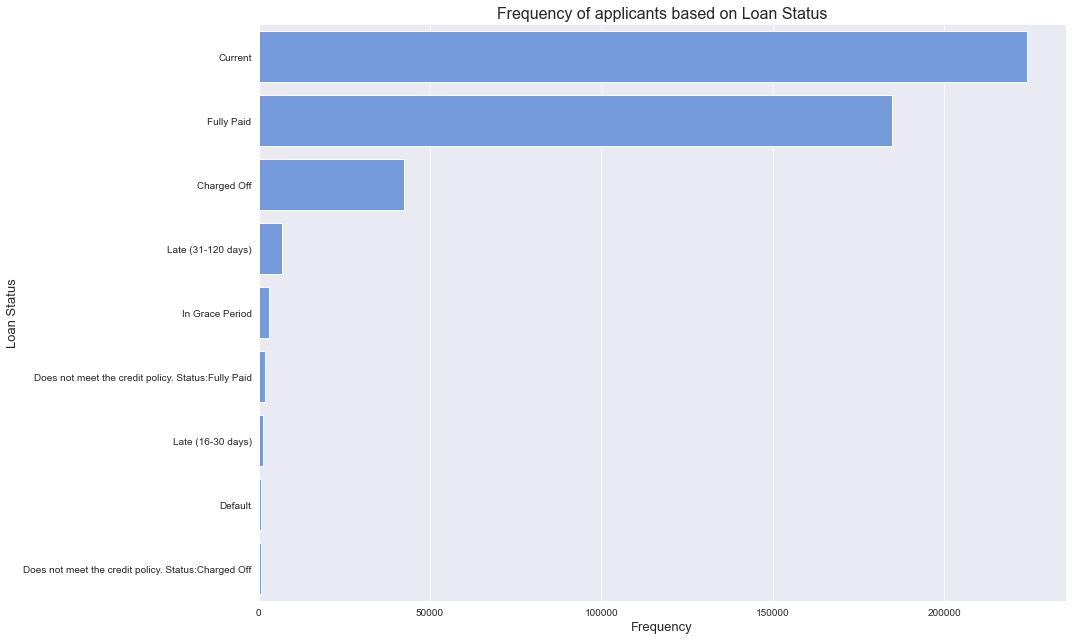

In [128]:
sns.set_style('darkgrid')
plt.figure(figsize = (15, 9))

#set title
plt.title('Frequency of applicants based on Loan Status', fontsize = 16)

sns.barplot(x = 'frequency', y = 'loan_status', data = ins, color = 'cornflowerblue')

#set x y label
plt.xlabel('Frequency', fontsize = 13)
plt.ylabel('Loan Status', fontsize = 13)

plt.tight_layout()

Berdasarkan visualisasi di atas `Loan Status Current` memiliki frequency 224226 yang sekitar 48% dan diikuti oleh `Loan Status Fully Paid` 184739 freq (39.62%) dan `Loan Status Charged Off` 42475 freq (9.11%)

In [93]:
ins2 = df.groupby(['Status_Borrower']).agg({'id' : 'count'}).sort_values(['id'], ascending = False).reset_index()
ins2.columns = ['Status_Borrower', 'frequency']
ins2['percentage %'] = round(ins2['frequency'] * 100 / sum(ins['frequency']), 2)
ins2

,Status_Borrower,frequency,percentage %
0,1,414099,88.81
1,0,52186,11.19


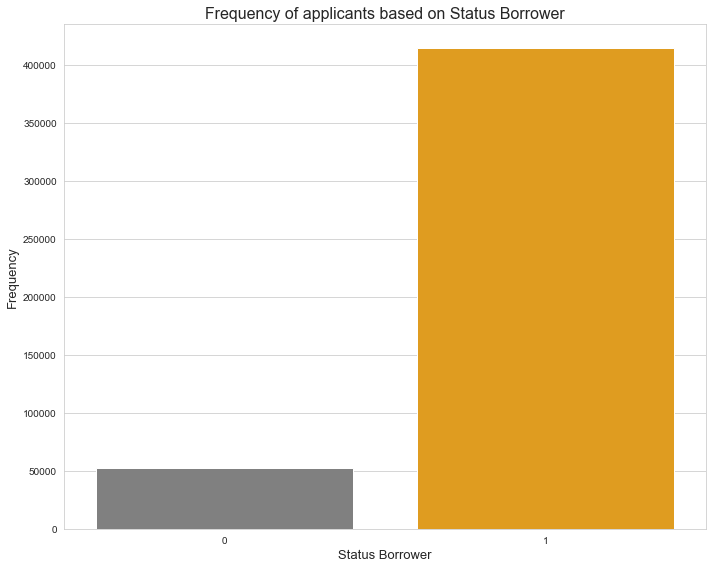

In [127]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))

#set title
plt.title('Frequency of applicants based on Status Borrower', fontsize = 16)

colr = cols = ['orange' if (x < max(ins2['Status_Borrower'])) else 'grey' for x in ins2['Status_Borrower']]
sns.barplot(x = 'Status_Borrower', y = 'frequency', data = ins2, palette = colr)

#set x y label
plt.xlabel('Status Borrower', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)

plt.tight_layout()